### Introduction <a id='introduction'></a>
**Purpose:** \
Take on the role of an e-commerce company whose products are sold on Amazon. The goal is to provide guidance on an upcoming product launch.

**Data:** \
Data scraped from amazon.com, sourced from [Kaggle](https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products?select=amazon_products.csv). Contains pricing and sales of all products on Amazon US for September 2023.

**Summary of wrangling:** 
* Converted raw data to a sql database
* Identified product to launch and its market, which is a vitamin c serum
* Have not identified a company, this can be undecided

**Specific questions to answer:** \
Product Launch: 
1. What existing products are on the market? 
    1. What is the size of the market? 
        * How much in revenue was made Sept 2023 for all products in the market? 
        * How many products make up 75% of market revenue?
    2. Which products dominate the market? 
        * What differentiates the successful products the rest? 
        * How can we market/design our product so that we can breach the market? (do some nlp, what are customers saying about a product) 
        * How much revenue can we expect under some specific assumptions? 

**Outcomes of this notebook:**
* Described current state of market
    * there are 75 products in vitamin c serum market
    * total monthly revenue of all products is \$1,282,00
    * top 25% of sellers made \$848,000 which is approximately 66% of market
        * mean price of top 25% is \$32.32
        * median revenue of top 25% is \$31,500
    * number of units sold independent of price
* Identified optimal price range
    * \$20-\\$40
* Set expectations for revenue
    * median monthly revenue for all products is \$10,000
    * try to make \$10,000 in revenue within 3 months after launch
    * by 6 months, try to hit \$31,500
* Strategized title generation
    * Stick to about 30 words in title
    * Include bottle size (1 oz, 30 mL, etc.)
    * Important words/phrases to include are
        * serum, face, ferulic acid, hyaluronic acid, brightening, anti aging, vitamin
            * tells us that customers are smart and want to know the active ingredients, so include them!
            * popular active ingredients are vitamin c, vitamin e, ferulic acid, and hyaluronic acid
            * customers also like descriptors "brightening" and "anti-aging"
            * be sure to call it a serum, and specify that it is for the face
    * Less important words are
        * women, hydrating, firming, retinol

### Contents <a id='contents'></a>
* [Introduction](#introduction)
* [Contents](#contents)
* [Objectives](#objectives)
* [Summary](#summary)
* [Loading Data](#loading_data)
* [Market Details](#market_details)
* [Market Size](#market_size)
* [Title Analysis](#title_analysis)

### Objectives <a id='objectives'></a>

Answer the following questions relating to a ficticious vitamin c serum product launch
1. What existing products are on the market? 
    1. What is the size of the market? 
        * How much in revenue was made Sept 2023 for all products in the market? 
        * How many products make up 75% of market revenue?
    2. Which products dominate the market? 
        * What differentiates the successful products the rest? 
        * How can we market/design our product so that we can breach the market? (do some nlp, what are customers saying about a product) 
        * How much revenue can we expect under some specific assumptions? 


### Summary <a id='summary'></a>

* To be filled in later

### Loading Data <a id='loading_data'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
conn = sqlite3.connect('../data/amazon2023.db')
cur = conn.cursor()

In [3]:
query = '''
SELECT title, productURL, stars, reviews, price, isBestSeller, boughtInLastMonth
FROM skin_care
WHERE title LIKE '%vitamin c serum%'
ORDER BY boughtInLastMonth DESC, stars DESC
'''
vit_c_serums = pd.read_sql(query, conn)

### Market Details <a id='market_details'></a>

Summary:
* 75 vitamin c serums on amazon
    * median price is \$19.99 [Q1=\\$14.99, Q3=\\$31.75]
        * (mean, median) revenue for products with median price = (\$21,560, \\$9,985)
    * median revenue for all vitamin c products is \$10,000 [Q1=\\$4,300, Q3=\\$21,800]


In [13]:
vit_c_serums.shape

(75, 8)

In [4]:
vit_c_serums['revenue'] = vit_c_serums['price']*vit_c_serums['boughtInLastMonth']

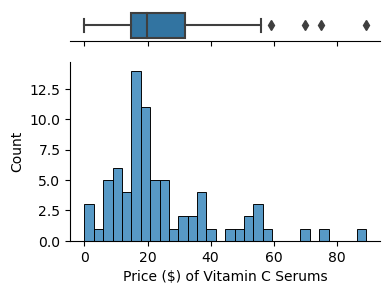

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(4,3), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=vit_c_serums.price, ax=ax_box)
sns.histplot(x=vit_c_serums.price, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlabel('Price ($) of Vitamin C Serums')
ax_box.set_xlabel('');

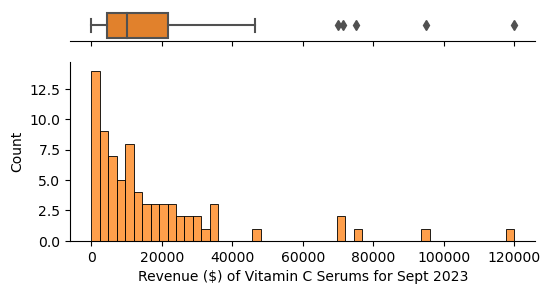

In [12]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(6,3), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=vit_c_serums.revenue, ax=ax_box, color='C1')
sns.histplot(x=vit_c_serums.revenue, bins=50, ax=ax_hist, color='C1')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlabel('Revenue ($) of Vitamin C Serums for Sept 2023')
ax_box.set_xlabel('');

In [7]:
vit_c_serums[['price', 'revenue']].quantile([0.25, 0.5, 0.75])

,price,revenue
0.25,14.875,4307.0
0.50,19.970,9990.0
0.75,31.745,21815.0


In [28]:
mean = vit_c_serums[[a and b for a,b in zip(vit_c_serums['price'] < 21, vit_c_serums['price'] > 19)]].revenue.mean()
median = vit_c_serums[[a and b for a,b in zip(vit_c_serums['price'] < 21, vit_c_serums['price'] > 19)]].revenue.median()
print('(mean, median) revenue for products with median price = (${:.2f}, ${:.2f})'.format(mean, median))

(mean, median) revenue for products with median price = ($21560.11, $9985.00)


### Market Size <a id='market_size'></a>

Summary:
* total revenue for all products = \$1,282,000
    * top 5% of earners made \$361,210, which is 28% of share
        * average price for these earners is \$19.50 and sold, on average, 4,750 units. **Higher price does not support more sales**
        * also, average rating is 4.5. Can think of 4.5 as threshold for credibility.
    * top 25% of earners made \$847,859, which is 66% of share
        * average price is \$32.32 and sold, on average, 1900 units.
        * also, average rating is 4.5
* total number of units sold = 58300
* **Think strategy here is to price our product in the range of \$20-40. Want to be in the competitive range at the same time, we want to appear as a premium product.**
    * At a price of \$20-24, would need to sell 420-450 units per month to make \\$10,000 in revenue (the median revenue for all products), and would need to sell 900-1000 units to be in the top 25% of earners
    * Crafting an appealing title will be out best chance of attracting customers
        * Will identify key words in the titles of products whose revenue is in the top 25% (>\$21,815) and whose price is within the range of \\$20-40

In [31]:
print('total revenue for all products = {:.2f}'.format(vit_c_serums['revenue'].sum()))

total revenue for all products = 1282233.00


In [32]:
print('total number of units sold = {:.0f}'.format(vit_c_serums['boughtInLastMonth'].sum()))

total number of units sold = 58300


In [33]:
med_price_mask = [a and b for a,b in zip(vit_c_serums['price'] < 21, vit_c_serums['price'] > 19)]

In [36]:
print('revenue of median priced products = {:.0f}'.format(vit_c_serums[med_price_mask]['revenue'].sum()))

revenue of median priced products = 194041


In [39]:
vit_c_serums[vit_c_serums['revenue'] >= 21800]['revenue'].sum()/1282233.00

0.6612362963673529

In [47]:
q1q3_rev_mask = [a and b for a,b in zip(vit_c_serums['revenue'] < 21800, vit_c_serums['revenue'] > 4300)]

In [50]:
print('total revenue for products with revenue between Q1 and Q3 = {:.0f}'.format(vit_c_serums[q1q3_rev_mask]['revenue'].sum()))

total revenue for products with revenue between Q1 and Q3 = 403278


In [58]:
print('revenue of top 95% earners = {:.0f}'.format(vit_c_serums[vit_c_serums['revenue'] >= 70404]['revenue'].sum()))

revenue of top 95% earners = 361210


In [63]:
vit_c_serums[vit_c_serums['revenue'] >= 70404]

,title,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,revenue
0,SKIN DEVA 20% Vitamin C Serum for Face with Vi...,https://www.amazon.com/dp/B01BJCX44Q,4.3,0,19.99,0,6000,119940.0
1,"Vanicream Vitamin C Serum - Free of Dyes, Frag...",https://www.amazon.com/dp/B0BJ4GZTK1,4.5,0,18.99,0,5000,94950.0
2,PURA D'OR 20% Vitamin C Serum (4oz BEST VALUE)...,https://www.amazon.com/dp/B00KMCEA4S,4.4,0,14.99,0,5000,74950.0
3,Mad Hippie Vitamin C Serum for Face with Hyalu...,https://www.amazon.com/dp/B005IXQLDE,4.6,0,23.79,0,3000,71370.0


Text(0, 0.5, 'Units Sold in Sept 2023')

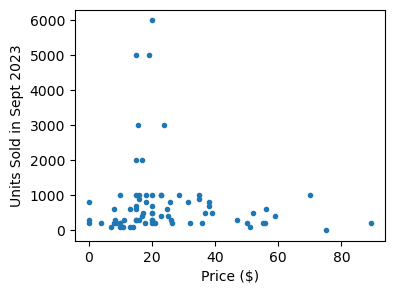

In [178]:
plt.figure(figsize=(4,3))
plt.plot(vit_c_serums['price'], vit_c_serums['boughtInLastMonth'], '.')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold in Sept 2023')

In [66]:
vit_c_serums['revenue'].quantile(0.75)

21815.0

In [176]:
print('median revenue of top 75% earners = {:.0f}'.format(vit_c_serums[vit_c_serums['revenue'] >= 21815]['revenue'].median()))

median revenue of top 75% earners = 31500


In [68]:
print('revenue of top 75% earners = {:.0f}'.format(vit_c_serums[vit_c_serums['revenue'] >= 21815]['revenue'].sum()))

revenue of top 75% earners = 847859


In [79]:
vit_c_serums[vit_c_serums['revenue'] >= 21815].sort_values(by='revenue', ascending=False)

,title,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,revenue
0,SKIN DEVA 20% Vitamin C Serum for Face with Vi...,https://www.amazon.com/dp/B01BJCX44Q,4.3,0,19.99,0,6000,119940.0
1,"Vanicream Vitamin C Serum - Free of Dyes, Frag...",https://www.amazon.com/dp/B0BJ4GZTK1,4.5,0,18.99,0,5000,94950.0
2,PURA D'OR 20% Vitamin C Serum (4oz BEST VALUE)...,https://www.amazon.com/dp/B00KMCEA4S,4.4,0,14.99,0,5000,74950.0
3,Mad Hippie Vitamin C Serum for Face with Hyalu...,https://www.amazon.com/dp/B005IXQLDE,4.6,0,23.79,0,3000,71370.0
14,goPure Actives Serum Trio Set - Radiant Vitami...,https://www.amazon.com/dp/B09KH97KF2,4.3,0,69.99,0,1000,69990.0
4,Tree of Life Vitamin C Serum for Face - 1 Fl O...,https://www.amazon.com/dp/B00S2G786S,4.4,0,15.49,0,3000,46470.0
11,TruSkin Face Serum Duo – Retinol Serum for Fac...,https://www.amazon.com/dp/B08DCD5MRW,4.4,0,34.99,0,1000,34990.0
6,Kleem Organics Pure Vitamin C Serum for Face w...,https://www.amazon.com/dp/B00KOUALMS,4.3,0,16.97,0,2000,33940.0
29,Ursa Major Natural Vitamin C Serum | Brighteni...,https://www.amazon.com/dp/B071G1Q95T,4.5,0,56.00,0,600,33600.0
18,C Serum 22 – Pure Vitamin C Serum for Face wit...,https://www.amazon.com/dp/B00JLPM8AK,4.3,0,35.00,0,900,31500.0


### Title Analysis <a id='title_analysis'></a>

Takeaways:
* Stick to about 30 words in title
* Include bottle size (1 oz, 30 mL, etc.)
* Important words/phrases to include are
    * serum, face, ferulic acid, hyaluronic acid, brightening, anti aging, vitamin
        * tells us that customers are smart and want to know the active ingredients, so include them!
        * popular active ingredients are vitamin c, vitamin e, ferulic acid, and hyaluronic acid
        * customers also like descriptors "brightening" and "anti-aging"
        * be sure to call it a serum, and specify that it is for the face
* Less important words are
    * women, hydrating, firming, retinol
        * if tight on word count, omit, but can include

In [86]:
price_mask = [a and b for a,b in zip(vit_c_serums['price'] >= 19.80, vit_c_serums['price'] <= 41)]
price_rev_mask = [a and b for a,b in zip(vit_c_serums['revenue'] >= 21815, price_mask)]
vit_c_serums[price_rev_mask]

,title,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,revenue
0,SKIN DEVA 20% Vitamin C Serum for Face with Vi...,https://www.amazon.com/dp/B01BJCX44Q,4.3,0,19.99,0,6000,119940.0
3,Mad Hippie Vitamin C Serum for Face with Hyalu...,https://www.amazon.com/dp/B005IXQLDE,4.6,0,23.79,0,3000,71370.0
8,"DearKlairs Freshly Juiced Vitamin Drop, 5% Hyp...",https://www.amazon.com/dp/B010FOFSH0,4.5,0,23.00,0,1000,23000.0
11,TruSkin Face Serum Duo – Retinol Serum for Fac...,https://www.amazon.com/dp/B08DCD5MRW,4.4,0,34.99,0,1000,34990.0
12,"Super C Serum, Vibrance Vitamin C Serum for Fa...",https://www.amazon.com/dp/B0CFG5F4TV,4.4,0,22.99,0,1000,22990.0
13,"Vitamin C Serum for Face, Retinol Serum for Fa...",https://www.amazon.com/dp/B0B7J3VQ3H,4.4,0,28.49,0,1000,28490.0
18,C Serum 22 – Pure Vitamin C Serum for Face wit...,https://www.amazon.com/dp/B00JLPM8AK,4.3,0,35.00,0,900,31500.0
19,"Eight Saints Vitamin C Serum For Face, Anti Ag...",https://www.amazon.com/dp/B08Z2BJ473,4.7,0,38.00,0,800,30400.0
22,Mario Badescu Vitamin C Serum for All Skin Typ...,https://www.amazon.com/dp/B003L8RVZ0,4.5,0,31.50,0,800,25200.0
26,"Fièra Vitamin C Serum, Hyaluronic Acid and Cit...",https://www.amazon.com/dp/B09GW8XDX8,4.4,0,37.97,0,700,26579.0


In [107]:
target_titles = list(vit_c_serums[price_rev_mask]['title'].values)
complement_titles = list(vit_c_serums[[not a for a in price_rev_mask]]['title'].values)

In [110]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_md")

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
target_titles

['SKIN DEVA 20% Vitamin C Serum for Face with Vitamin E Plus Ferulic Acid Skincare Serum 1 fl oz 30 ML Rejuvenates Skin to Fresh & Neutralizes Free Radicals to Brighten Even Vitamin Serum',
 'Mad Hippie Vitamin C Serum for Face with Hyaluronic Acid, Vitamin E & Ferulic Acid - Vitamin C Face Serum for Women/Men, Skin-Brightening Serum, 1.02 Fl Oz',
 'DearKlairs Freshly Juiced Vitamin Drop, 5% Hypoallergenic pure vitamin C serum, 1.18oz | ascorbic acid vitamin c serum, antioxidant serum for face, korean skincare',
 'TruSkin Face Serum Duo – Retinol Serum for Face & Vitamin C Serum – Anti Aging Skin Care Set for Women – Skin Care for Bright, Smooth, & Firm Skin – 1 fl oz, 2 Bottles',
 'Super C Serum, Vibrance Vitamin C Serum for Face, Vibrance Vit C Serum for Mature Skin, Serum Vitamina C, Vitamin C Face Serum Targets Age Spots, Wrinkles, Smooths Skin.1 fl oz',
 'Vitamin C Serum for Face, Retinol Serum for Face with Hyaluronic Acid Serum for Face, Retinol Face Anti Aging Serum, Vitamin C 

In [109]:
complement_titles

['Vanicream Vitamin C Serum - Free of Dyes, Fragrance, Masking Fragrance, Lanolin, Parabens & Formaldehyde Releasers - For Sensitive Skin - 1.2 Fl Oz',
 "PURA D'OR 20% Vitamin C Serum (4oz BEST VALUE) Lightweight Maximum Strength Formula,Hyaluronic Acid,Retinol,Professional Grade Treatment For Face & Eyes,Dark Spots,Acne,Wrinkles,For Men & Women",
 'Tree of Life Vitamin C Serum for Face - 1 Fl Oz Skin Care Serums - Moisturizing Vitamin E for Brightening & Smoothing Dry Skin, Anti-Aging, Wrinkles & Dark Spot, Sensitive Skin - Dermatologist-Tested',
 'DOUBLE SIZED (2 oz) PURE VITAMIN C SERUM FOR FACE With Hyaluronic Acid - Anti Wrinkle, Anti Aging, Dark Circles, Age Spots, Vitamin C, Pore Cleanser, Acne Scars, Organic Vegan Ingredients',
 'Kleem Organics Pure Vitamin C Serum for Face with Hyaluronic Acid & Vitamin E - Anti Aging Vitamin C Face Serum for Women to Boost Collagen, Reduce Wrinkle, Acne, Dark Spot & Sun Damage - Vit C Serum',
 'Vitamin C Face Serum with Hyaluronic Acid: Lupur

In [152]:
STOP_WORDS = STOP_WORDS.difference({'he','his','her','hers'}).union({'oz', '&', 'fl', 'ml', 'll', 've', '1oz', '20', '2oz', '30', '30ml', '4oz', '50ml'})

In [153]:
tfidf = TfidfVectorizer(stop_words=list(STOP_WORDS), ngram_range=(1,2), max_features=200)

In [154]:
tfidf.fit(complement_titles)

TfidfVectorizer(max_features=200, ngram_range=(1, 2),
                stop_words=['everywhere', 'several', 'top', 'three',
                            'meanwhile', 'because', 'when', 'already',
                            'everyone', '’ll', 'get', 'all', 'against', 'many',
                            'just', 'amount', 'its', 'out', 'become', 'was',
                            'six', 'to', 'twenty', 'some', 'in', 'noone',
                            'nothing', 'nobody', 'their', 'about', ...])

In [170]:
df = pd.DataFrame()

In [173]:
df['features'] = tfidf.get_feature_names_out()
df['tf-idf_target'] = np.array(tfidf.transform(target_titles).mean(axis=0)).reshape(-1)
df['tf-idf_complement'] = np.array(tfidf.transform(complement_titles).mean(axis=0)).reshape(-1)
df['tf-idf_diff'] = df['tf-idf_target'] - df['tf-idf_complement']

In [175]:
df.sort_values(by='tf-idf_diff', ascending=False).head(35)

,features,tf-idf_target,tf-idf_complement,tf-idf_diff
139,serum,0.261220,0.165949,0.095271
60,face,0.176824,0.105494,0.071330
4,acid vitamin,0.094581,0.026230,0.068350
143,serum face,0.131757,0.067769,0.063988
160,skincare,0.086703,0.024214,0.062489
69,ferulic,0.079447,0.017667,0.061780
70,ferulic acid,0.079447,0.017667,0.061780
126,pure vitamin,0.068755,0.011249,0.057507
0,acid,0.116416,0.064182,0.052234
24,brightening serum,0.065859,0.018197,0.047662


Important words/phrases are: \
serum, face, ferulic acid, hyaluronic acid, brightening, anti aging, vitamin

Less important words/phrases are: \
women, hydrating, firming, retinol

In [168]:
np.mean([len(title.split()) for title in target_titles])

31.5

In [169]:
np.mean([len(title.split()) for title in complement_titles])

27.323076923076922

Want to stick to about 30 words in title, also want to include size of bottle